Sentiment Classifier (Starter Code)
---

We will be creating a LogisticRegresion model with TF-IDF for sentiment classification. This notebook contains the required methods to read the data and create a pandas dataframe to start modeling.

Let's start by importing the required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import csv

Reading the data from the respective CSV files. (Change the directory paths as needed).

In [5]:
# dev_datasets = Path("dev-datasets")
# test_datasets = Path("starting-kit-test")

def load_csv(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

train_data = load_csv("/content/drive/MyDrive/train.csv")
test_data = load_csv("/content/drive/MyDrive/test.csv")

# print number of rows and columns
print("Train data: ", len(train_data), len(train_data[0]))
# print("Dev data: ", len(dev_data), len(dev_data[0]))
print("Test data: ", len(test_data), len(test_data[0]))

# Convert to pandas dataframe
train_df = pd.DataFrame(train_data[1:], columns=train_data[0])
# dev_df = pd.DataFrame(dev_data[1:], columns=dev_data[0])
test_df = pd.DataFrame(test_data[1:], columns=test_data[0])

Train data:  92229 3
Test data:  5111 2


We see that the dev and test data (when released). Don't have their labels. Hence all the modelling activity is done only on the train data.

So let's have a look at the training data

In [6]:
train_df.head()

,text_id,sentence,gold_label
0,r1-0051002,"Cheers,\n\nDennis Nguyen\n416-879-6431",0
1,r1-0020356,May have to wait longer on holidays.,-1
2,r1-0058348,"I drove to vegas may 6th, to get my hair done.",0
3,r1-0080006,"In addition, I eat out often at various restau...",1
4,r1-0000827,Perhaps she was doing us a favor?,0


In [7]:
test_df.head()

,text_id,sentence
0,r1-0086521,A helpful valet at the Bellagio said it was a ...
1,r1-0044715,"People often ask ""what happened to the human c..."
2,r1-0060690,He explained there would be a diagnostic fee o...
3,r1-0016852,I had initially purchased a massage on Groupon.
4,r2-0006040,Primarily do high-end cars as they get referra...


## Data Analysis

This section is left blank but encourages you to do some data analysis on the training, dev and test data (if available). You can gain some interesting insights from the data and it can help in the modelling perspective.

Ideas:
- Label distribution (make a bar chart)
- NER extraction (maybe remove the entities to see if the accuracy is affected)
- Some unreadable characters or special characters (This can be removed as an attempt at data cleaning) (Regex is your best friend here)

In [8]:
# Class distribution
train_class_counts = train_df['gold_label'].value_counts()
print("Train Class Distribution:\n", train_class_counts)



Train Class Distribution:
 gold_label
0     45489
1     27353
-1    19386
Name: count, dtype: int64


In [9]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = [
    'a', 'an', 'the', 'and', 'or', 'if', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than',
    'too', 'now', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'this', 'that',
    'these', 'those', 'what', 'which', 'who', 'whom', 'where', 'when',
    'how', 'here', 'there', 'is', 'was', 'am', 'are', 'be', 'been', 'being'
]


# Initialize stemmer and spaCy lemmatizer
stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def clean_text(text, remove_stopwords=True, use_stemming=True, use_lemmatization=False):
    # Normalize text to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize text
    words = text.split()

    # Remove stop words
    if remove_stopwords:
        words = [word for word in words if word not in stop_words]

    # Apply stemming
    if use_stemming:
        words = [stemmer.stem(word) for word in words]

    # Apply lemmatization (instead of stemming)
    if use_lemmatization:
        words = [token.lemma_ for token in nlp(" ".join(words))]

    return " ".join(words)


In [11]:
pip install swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 16.6 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=0a90163ae36c4d7fdcb9a6e7afff11a6570bb4fe891fe0484d4d9bd0298ed621
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [12]:
# Apply cleaning to training and dev sets
import swifter
train_df['cleaned_sentence'] = train_df['sentence'].swifter.apply(
    lambda x: clean_text(x, remove_stopwords=True, use_stemming=False, use_lemmatization=True)
)
# dev_df['cleaned_sentence'] = dev_df['sentence'].swifter.apply(
#     lambda x: clean_text(x, remove_stopwords=True, use_stemming=False, use_lemmatization=True)
# )
test_df['cleaned_sentence'] = test_df['sentence'].swifter.apply(
    lambda x: clean_text(x, remove_stopwords=True, use_stemming=False, use_lemmatization=True)
)

# Preview the cleaned data
print(train_df[['sentence', 'cleaned_sentence']].head())
# print(dev_df[['sentence', 'cleaned_sentence']].head())
print(test_df[['sentence', 'cleaned_sentence']].head())


Pandas Apply:   0%|          | 0/92228 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5110 [00:00<?, ?it/s]

                                            sentence  \
0             Cheers,\n\nDennis Nguyen\n416-879-6431   
1               May have to wait longer on holidays.   
2    I drove to vegas may 6th,  to get my hair done.   
3  In addition, I eat out often at various restau...   
4                  Perhaps she was doing us a favor?   

                                    cleaned_sentence  
0                                cheer dennis nguyen  
1                         may have wait long holiday  
2                     drive vegas may th get hair do  
3  addition eat often various restaurant clevelan...  
4                                perhaps do we favor  
                                            sentence  \
0  A helpful valet at the Bellagio said it was a ...   
1  People often ask "what happened to the human c...   
2  He explained there would be a diagnostic fee o...   
3    I had initially purchased a massage on Groupon.   
4  Primarily do high-end cars as they get referra... 

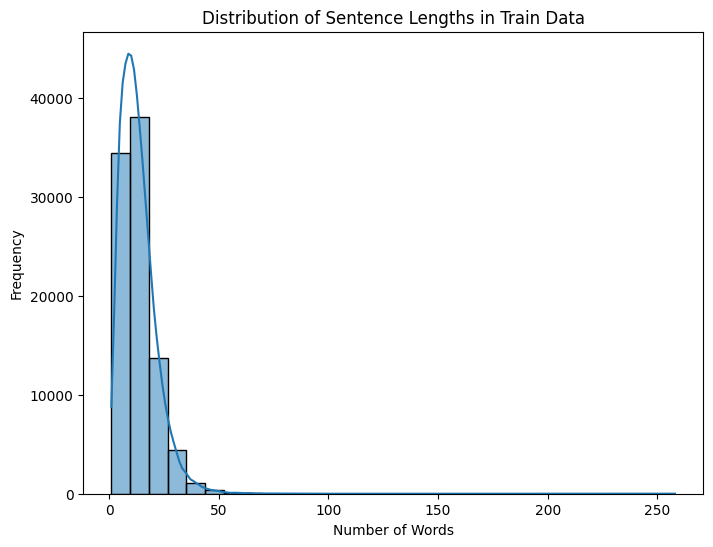

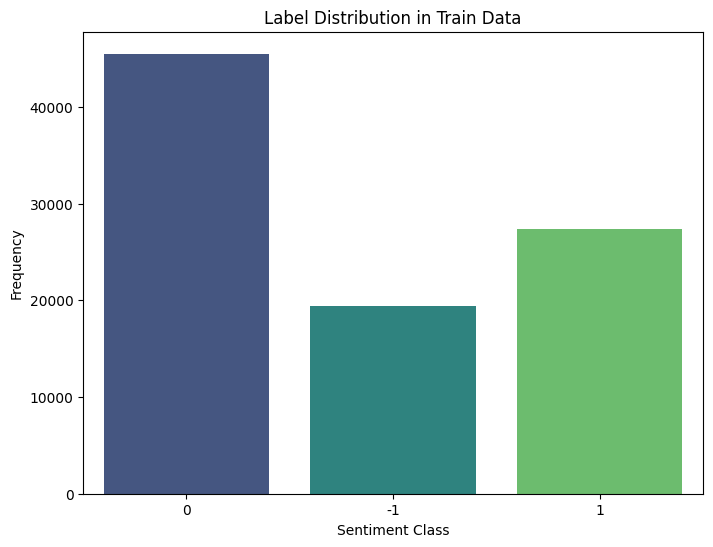

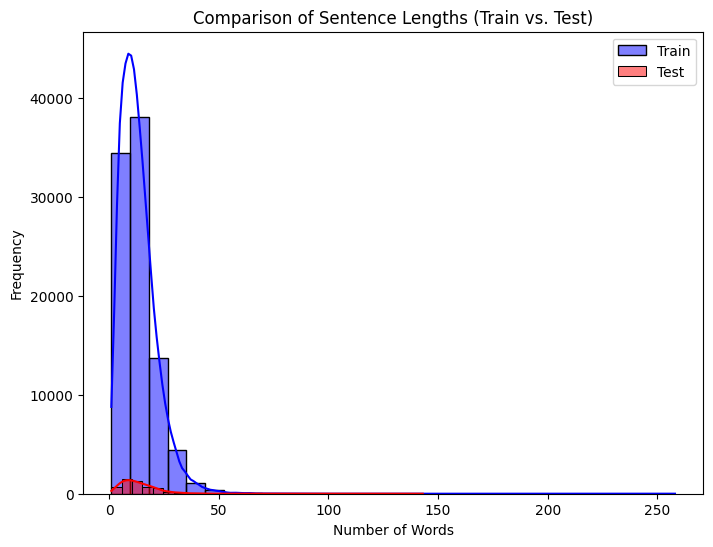

Top 10 most common words in Train Data:
the: 47297
I: 37978
and: 35232
a: 33208
to: 33080
was: 19945
of: 16559
for: 15148
in: 13998
my: 11920


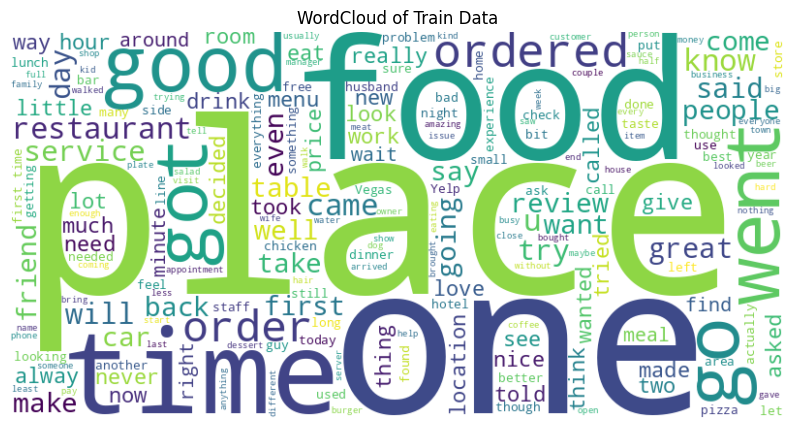

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Length of sentences in the training data
train_df['sentence_length'] = train_df['sentence'].apply(lambda x: len(x.split()))

# Plot histogram of sentence lengths
plt.figure(figsize=(8, 6))
sns.histplot(train_df['sentence_length'], bins=30, kde=True)
plt.title("Distribution of Sentence Lengths in Train Data")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gold_label', data=train_df, palette='viridis')
plt.title("Label Distribution in Train Data")
plt.xlabel("Sentiment Class")
plt.ylabel("Frequency")
plt.show()



# Sentence lengths in test data
test_df['sentence_length'] = test_df['sentence'].apply(lambda x: len(x.split()))

# Compare train vs. test sentence lengths
plt.figure(figsize=(8, 6))
sns.histplot(train_df['sentence_length'], bins=30, color='blue', label='Train', kde=True)
sns.histplot(test_df['sentence_length'], bins=30, color='red', label='Test', kde=True)
plt.title("Comparison of Sentence Lengths (Train vs. Test)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

from collections import Counter
from wordcloud import WordCloud

# Combine all sentences
all_sentences = ' '.join(train_df['sentence'])

# Count word frequencies
word_counts = Counter(all_sentences.split())
common_words = word_counts.most_common(10)

# Print top 10 common words
print("Top 10 most common words in Train Data:")
for word, count in common_words:
    print(f"{word}: {count}")

# WordCloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_sentences)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Train Data")
plt.show()


In [ ]:
test_df['cleaned_sentence'] = test_df['sentence'].swifter.apply(
    lambda x: clean_text(x, remove_stopwords=True, use_stemming=False, use_lemmatization=True)
)
print(test_df[['sentence', 'cleaned_sentence']].head())

Pandas Apply:   0%|          | 0/5110 [00:00<?, ?it/s]

                                            sentence  \
0  A helpful valet at the Bellagio said it was a ...   
1  People often ask "what happened to the human c...   
2  He explained there would be a diagnostic fee o...   
3    I had initially purchased a massage on Groupon.   
4  Primarily do high-end cars as they get referra...   

                                    cleaned_sentence  
0  helpful valet bellagio say minute walk really ...  
1           people often ask happen human connection  
2  explain would diagnostic fee but call back tel...  
3            have initially purchase massage groupon  
4  primarily do highend car get referral major so...  


## Modelling



In [ ]:
import numpy as np
import torch

# Path to the GloVe file (download from Stanford's website)
glove_path = "/content/drive/MyDrive/glove.6B.300d.txt"  # Replace with your file path in Colab
# Load GloVe embeddings
def load_glove_embeddings(glove_path, embedding_dim=300):
    embeddings_index = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")
    return embeddings_index

# Initialize GloVe embeddings
embedding_dim = 300  # Change this to match the GloVe file (50, 100, 200, or 300)
glove_embeddings = load_glove_embeddings(glove_path, embedding_dim)



Loaded 400000 word vectors from GloVe.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Load GloVe embeddings
def load_glove_embeddings(glove_path, embedding_dim=300):
    embeddings_index = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

glove_embeddings = load_glove_embeddings(glove_path, embedding_dim=300)



In [ ]:
train_df.head(50)


,text_id,sentence,gold_label,cleaned_sentence
0,r1-0051002,"Cheers,\n\nDennis Nguyen\n416-879-6431",0,cheer dennis nguyen
1,r1-0020356,May have to wait longer on holidays.,-1,may have wait long holiday
2,r1-0058348,"I drove to vegas may 6th, to get my hair done.",0,drive vegas may th get hair do
3,r1-0080006,"In addition, I eat out often at various restau...",1,addition eat often various restaurant clevelan...
4,r1-0000827,Perhaps she was doing us a favor?,0,perhaps do we favor
5,r1-0069193,I checked my Magic Eight Ball for the Diamond'...,0,check magic eight ball diamond future
6,r2-0003386,This place has Dim Sum 7 days a week and they ...,-1,place have dim sum day week make fresh order t...
7,r1-0006703,They don't take credit card below a certain am...,0,do not take credit card certain amount forget ...
8,r2-0000625,I have a pal who's going to tell me the same s...,0,have pal who s go tell story occasionally
9,r1-0006980,Chili is an item that never needs to be shorte...,-1,chili item never need shorted should always ready


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


In [ ]:
# Assuming train_df contains labeled data
def map_labels(label):
    if label == '-1':
        return 0  # Map -1 to 0
    elif label == '0':
        return 1  # Keep 0 as 1
    elif label == '1':
        return 2  # Map 1 to 2

train_df['mapped_label'] = train_df['gold_label'].apply(map_labels)

# Dataset Class
class SentenceDataset(Dataset):
    def __init__(self, sentences, labels=None, glove_embeddings=None, max_len=50):
        self.sentences = sentences
        self.labels = labels
        self.glove_embeddings = glove_embeddings
        self.max_len = max_len
        self.has_labels = labels is not None  # Check if labels are provided

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        if self.has_labels:
            label = self.labels.iloc[idx]  # Use .iloc to safely access the label
        embedding = self.sentence_to_glove_embedding(sentence)
        if self.has_labels:
            return torch.tensor(embedding, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
        else:
            return torch.tensor(embedding, dtype=torch.float32)

    def sentence_to_glove_embedding(self, sentence):
        words = sentence.split()
        embeddings = []
        for word in words[:self.max_len]:
            embedding = self.glove_embeddings.get(word, np.zeros(300))  # GloVe embedding
            embeddings.append(embedding)
        while len(embeddings) < self.max_len:
            embeddings.append(np.zeros(300))  # Padding with zero vectors
        return np.array(embeddings)


# Bi-GRU with Attention Model
class BiGRUWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, attention_dim):
        super(BiGRUWithAttention, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.attn = nn.Linear(hidden_dim * 2, attention_dim)  # attention_dim will be the dimensionality of attention weights
        self.attn_combine = nn.Linear(attention_dim, 1)  # To reduce attention dimension
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Final classification layer (3 outputs for 3 classes)

    def attention(self, gru_out):
        attn_weights = torch.softmax(self.attn(gru_out), dim=1)
        attn_weights = torch.softmax(self.attn_combine(attn_weights), dim=1)
        weighted_sum = torch.sum(attn_weights * gru_out, dim=1)
        return weighted_sum

    def forward(self, x):
        gru_out, _ = self.gru(x)
        attn_out = self.attention(gru_out)
        output = self.fc(attn_out)
        return output




# Prepare DataLoader for training (train_df with labels)
train_dataset = SentenceDataset(train_df['cleaned_sentence'], train_df['mapped_label'], glove_embeddings, max_len=50)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Prepare DataLoader for prediction (dev_df without labels)
# dev_dataset = SentenceDataset(dev_df['cleaned_sentence'], labels=None, glove_embeddings=glove_embeddings, max_len=50)
# dev_loader = DataLoader(dev_dataset, batch_size=32, shuffle=False)
test_dataset = SentenceDataset(test_df['cleaned_sentence'], labels=None, glove_embeddings=glove_embeddings, max_len=50)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Model, Loss, Optimizer
embedding_dim = 300
hidden_dim = 256
output_dim = 3  # 3 classes (mapped from -1, 0, 1)
attention_dim = 128


model = BiGRUWithAttention(input_dim=embedding_dim, hidden_dim=hidden_dim, output_dim=output_dim, attention_dim=attention_dim)
model = model.to(device)  # Move model to GPU

criterion = nn.CrossEntropyLoss()  # Using CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
# Training Loop
for epoch in range(14):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:  # Loop over training batches
        inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Loss computation
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")


Epoch 1, Loss: 0.7932, Accuracy: 65.90%
Epoch 2, Loss: 0.7106, Accuracy: 70.12%
Epoch 3, Loss: 0.6426, Accuracy: 73.43%
Epoch 4, Loss: 0.5554, Accuracy: 77.48%
Epoch 5, Loss: 0.4456, Accuracy: 82.71%
Epoch 6, Loss: 0.3344, Accuracy: 87.46%
Epoch 7, Loss: 0.2443, Accuracy: 91.22%
Epoch 8, Loss: 0.1888, Accuracy: 93.22%
Epoch 9, Loss: 0.1536, Accuracy: 94.49%
Epoch 10, Loss: 0.1352, Accuracy: 95.23%
Epoch 11, Loss: 0.1224, Accuracy: 95.61%
Epoch 12, Loss: 0.1114, Accuracy: 96.02%
Epoch 13, Loss: 0.1096, Accuracy: 96.14%
Epoch 14, Loss: 0.1040, Accuracy: 96.27%


In [ ]:
class SentenceDataset(Dataset):
    def __init__(self, sentences, glove_embeddings, max_len=50, labels=None):
        self.sentences = sentences
        self.labels = labels
        self.glove_embeddings = glove_embeddings
        self.max_len = max_len
        self.has_labels = labels is not None

    def __len__(self):
        return len(self.sentences)

    def sentence_to_glove_embedding(self, sentence):
        words = sentence.split()
        embedding = []
        for word in words:
            if word in self.glove_embeddings:
                embedding.append(self.glove_embeddings[word])
            else:
                embedding.append([0.0] * 300)
        if len(embedding) < self.max_len:
            embedding += [[0.0] * 300] * (self.max_len - len(embedding))
        else:
            embedding = embedding[:self.max_len]
        return embedding

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        embedding = self.sentence_to_glove_embedding(sentence)
        if self.has_labels:
            label = self.labels[idx]  # Access label safely from a list or dict
            return torch.tensor(embedding, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
        else:
            return torch.tensor(embedding, dtype=torch.float32)


In [ ]:
# Ensure the model is in evaluation mode
model.eval()

# Initialize a list to store predictions
predicted_labels = []

# DataLoader for the dev set (assuming dev_df is already preprocessed)
# dev_dataset = SentenceDataset(dev_df['sentence'], glove_embeddings, max_len=50)
# dev_loader = DataLoader(dev_dataset, batch_size=64, shuffle=False)

# Make predictions
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)  # Move inputs to GPU

        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Convert predictions back to -1, 0, 1
        for label in predicted:
            if label.item() == 0:  # Use .item() to get the Python scalar value
                predicted_labels.append(-1)
            elif label.item() == 1:
                predicted_labels.append(0)
            elif label.item() == 2:
                predicted_labels.append(1)

# Save predictions to a file
with open('answer.txt', 'w') as f:
    for label in predicted_labels:
        f.write(f"{label}\n")


A sample code to help in creating the `answer.txt` file required for submissions.